# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem ), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv('data/human_body_temperature.csv')

df.columns

Index(['temperature', 'gender', 'heart_rate'], dtype='object')

1. Let us study the data for normal temperature. We can find some info directly from the dataframe column:

In [2]:
df['temperature'].describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

We do have some values that are outside the conventional normal temperature range (from 97 °F to 100.4 °F), but since we are precisely studying these bounds and their average, we shall keep them in our data sets:

In [3]:
df['temperature'][(df['temperature']>100.4) | (df['temperature']<97)].sort_values()

125     96.3
39      96.4
11      96.7
105     96.7
95      96.8
42      96.9
116    100.8
Name: temperature, dtype: float64

Let us store some basic estimators of these data, like its average $\hat{\mu}$, standard deviation $s$, as well as the number of data points $n$. Using these estimators, we can build an associated normal distribution with the same mean and standard deviation. We will explore whether such distribution models accurately our data set.

In [4]:
mu_sample = np.mean(df['temperature'])

std_sample = np.std(df['temperature'],ddof=1)

n = len(df['temperature'])

theo_normal = stats.norm.rvs(mu_sample,std_sample,10000)

Here we introduce a couple of useful functions. `num_bins(data)` computes the number of bins for a histogram of data according to the Freedman–Diaconis rule, while `ecdf(data)` computes the empirical distribution function (ECDF) for a one-dimensional array of measurements.

In [5]:
def num_bins(data):
    """Computes the number of bins for a histogram of data according to the Freedman–Diaconis rule."""
    
    # Computes the interquartile range:
    iqr = np.percentile(data,75)-np.percentile(data,25)
    
    # Computes the bin size according to the Freedman–Diaconis rule:
    bin_size = 2*iqr/(len(data)**(1/3))
    
    #Computes the number of bins:
    n_bins = int((max(data)-min(data))/bin_size)
    
    return n_bins

In [6]:
def ecdf(data):
    """Computes the empirical cumulative distribution function (ECDF) for a one-dimensional array of measurements."""
    # sorts data: x
    x = np.sort(data) 

    # computes the ECDF: y
    y = np.arange(1, len(data) +1) / len(data)

    return x, y

Here we plot both the probability and empirical cumulative distribution functions for the data sample and the associated normal distribution. While an apparent similarity between the PDFs is not necesarilly a sufficient indicator of the normality of the data sample, we also find that the ECDFs are close, implying that there are no substantial differences in both location and shape of the cumulative distribution of the data. This amounts to a graphical Kolmogorov–Smirnov test.

C:\Users\scvargas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\scvargas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


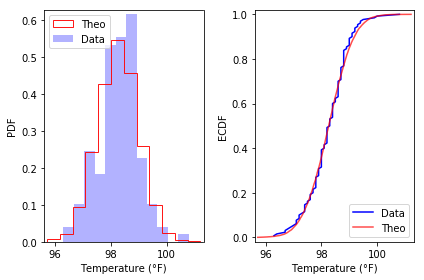

In [7]:
plt.subplot(1, 2, 1)

_ = plt.hist(df['temperature'], normed=True, bins=num_bins(df['temperature']), color='blue', alpha = 0.3)
_ = plt.hist(theo_normal, normed=1, bins=num_bins(df['temperature']), color='red', alpha = 0.9, histtype = 'step')
_ = plt.legend(('Theo','Data'), loc='upper left')
_ = plt.xlabel('Temperature (°F)')
_ = plt.ylabel('PDF')
_ = plt.margins(0.02)


plt.subplot(1, 2, 2)

x_set, y_set = ecdf(df['temperature'])
x_theo, y_theo = ecdf(theo_normal)

_ = plt.plot(x_set, y_set, color='blue')
_ = plt.plot(x_theo, y_theo, color='red', alpha=0.7)
_ = plt.legend(('Data', 'Theo'), loc='lower right')
_ = plt.xlabel('Temperature (°F)')
_ = plt.ylabel('ECDF')
_ = plt.margins(0.02)

plt.tight_layout()

plt.show()

#plt.show()

Another possible graphical test is a Q-Q plot, which plots quantiles of the sample and the theoretical distribution against each other. In this case, it also provides additional evidence for an anormal behavior of an outlier with the highest temperature:

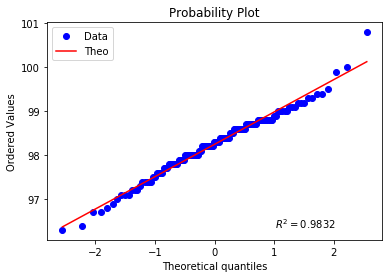

In [8]:
stats.probplot(df['temperature'], dist="norm", plot=plt, rvalue=True)
plt.legend(('Data', 'Theo'), loc='upper left')
plt.show()

2. Using the rule of thumb, $n > 30$, we can say we are working with a large sample. We have found evidence for it being normally distributed. We can also say the data is independent if we safely consider that the population of this problem is greater than 10 times the sample, which is particularly true if we are attempting to estimate a parameter of the 1990's world population. This fact allows us to claim independency even if there was sampling with no replacement. We do not have complete information on the randomness of the parent data (see [here](http://ww2.amstat.org/publications/jse/v4n2/datasets.shoemaker.html) for more information) and this factor may play a role in our final analysis. Nevertheless, for the porpuse of hypthesis testing, we will assume that the sample was obtained randomly.


3. The null hypothesis is $\mu = \mu_0 = 98.6 $ °F. Considering our first obervations of the data, we may take the alternative hypothesis to be $\mu < \mu_0$. Let us consider a significance level of $\alpha = 0.05$. Right away we can find some evidence for the rejection of the null hypothesis by checking the 95% confidence interval for $n$ draws:

In [9]:
stats.norm.interval(0.95, loc=mu_sample, scale=std_sample/n**(1/2))

(98.12319642818166, 98.3752651102799)

This indicates that, assuming a large, random, independent and normal sample, the null hypothesis mean $\mu_0$ lays outside the 95% confidence interval. Later we will explore this in more depth.

For a bootstrap hypothesis test, we draw a sample of bootstrap replicates with the mean as statistic target.

In [10]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

We find that the null hypothesis mean is not even in the 95% confidence interval of the bootstraps replicates. Assuming that the data collected is not spurious, we would be forced to reject the null hypothesis. We can also see this by computing a $p$-value for the hypthesis testing. In order to do this we: 1) produce a translated sample from the data that has the null hypothesis mean, 2) draw bootstrap replicates from this set with the mean as statistic and 3) compute the fraction of replicates with mean lower or equal than the measured mean. As expected, the $p$-value basically vanishes.

In [11]:
temp_array = df['temperature'].values

# Make an array of translated temperatures
translated_temp_array = temp_array - mu_sample + 98.6

# Take bootstrap replicates of translated_temp_array
bs_replicates = draw_bs_reps(translated_temp_array, np.mean, 10000)

# Compute fraction of replicates that are less or equal to the observed mean temperature: p
p_val_0 = np.sum(bs_replicates <= np.mean(temp_array)) / len(bs_replicates)

# Print the p-value
print('p = ', p_val_0)

p =  0.0


Now we can use a frequentist approach. Since we have concluded that the data set is approximately normal, independent and random, as well as large, we can resort to the hypothesis testing methods of z-statistics. The null hypothesis states that the true mean of the population is some specific value. The natural testing method is then the one-sample test, as we have no reason to divide the sample in subcategories (yet) to compare their mean, nor we have an additional sample.

Let us follow the z-statistics approach. The number $z$ of standard errors $\sigma_\mu$ between the the estimator for the mean $\hat{\mu}$ and the null hypothesis value $\mu_0$ is given by
\begin{equation}
z = \frac{\hat{\mu} - \mu_0}{\sigma_\hat{\mu}} \, ,
\end{equation}
where
\begin{equation}
\sigma_\hat{\mu} = \frac{\sigma}{\sqrt{n}} \approx \frac{s}{\sqrt{n}} \, .
\end{equation}
Here we make the distintion between the standard deviation of the population $\sigma$ and the standard deviation of the sample $s$. We do not have access to $\sigma$ but we approximate it with $s$ following the assumption of a sufficiently large set. $n$, as usual, corresponds to the size of the sample.

Following the assumption of a normal distribution, we can use $z$ to compute a $p$-value or, alternatively, an acceptance/rejection region given $\alpha$. In this case, we have a sample mean $\hat{\mu}$ well below the null value $\mu_0$, leading to $z < 0$. Hence, if we want to compute a $p$-value, we are interested in the *one-tail* region that corresponds to values lower or equal to $z$ in a normal distribution with mean $0$ and unit standard deviation. We can compute this by direct integration or with $p =$ `stats.norm.sf(abs(z))`.

On the other hand, we can use the level of significance $\alpha = 0.05$ and find a rejection bound with $z_\alpha$ = `stats.norm.ppf(.95)`. We may use this value to define a rejection region defined by RR $= \left\{ z : z < - z_\alpha \right\}$. This gives an *upper confidence bound* $\hat{\mu} + z_\alpha \, \sigma_\hat{\mu}$, which, if surpassed by $\mu_0$, forces us to reject the null hypothesis.


In [12]:
mu_0 = 98.6

standard_error = std_sample / n**(1/2)

z = (mu_sample - mu_0) / standard_error

p_val = stats.norm.sf(abs(z))
                        
z_alpha = stats.norm.ppf(.95)
                        
upper_confidence_bound = mu_sample + z_alpha * standard_error

print('The standard error is', standard_error, '°F.')
print('The z-statistic is ', z , '.')
print('The corresponding p-value is ', p_val , '.')
print('The upper confidence bound for a level of significance of 0.05 is ', upper_confidence_bound , '°F.')
print('This corresponds to a rejection bound z_alpha of', z_alpha, '.')

The standard error is 0.06430441683789101 °F.
The z-statistic is  -5.454823292364079 .
The corresponding p-value is  2.45107850705669e-08 .
The upper confidence bound for a level of significance of 0.05 is  98.35500212249558 °F.
This corresponds to a rejection bound z_alpha of 1.6448536269514722 .


All these indicators provide evidence for the rejection of the null hypothesis:

1) The $p$-value is of the order $10^{-8}$.

2) $z$ is well below $-z_\alpha$.

3) $\mu_0$ is above the upper confidence level.

Despite the fact that $n > 30$, let us consider a hypothesis testing with t-statistics.

Using the notation we introduced previously, the t-statistic can be found with
\begin{equation}
t = \frac{\hat{\mu} - \mu_0}{\sigma_\hat{\mu}} \, ,
\end{equation}
where
\begin{equation}
\sigma_\hat{\mu} = \frac{s}{\sqrt{n}} \, .
\end{equation}

Following the assumption of a Student's t-distribution, we can use $t$ to compute a $p$-value or, alternatively, an acceptance/rejection region given $\alpha$. In this case, we have a sample mean $\hat{\mu}$ well below the null value $\mu_0$, leading to $t < 0$. Hence, if we want to compute a $p$-value, we are interested in the *one-tail* region that corresponds to values lower or equal to $t$ in a t-distribution with mean $0$, unit standard deviation and $n-1$ degrees of freedom. We can compute this by direct integration or with $p =$ `stats.t.sf(abs(t), n-1)`.

On the other hand, we can use the level of significance $\alpha = 0.05$ and find a rejection bound with $z_\alpha$ = `stats.t.ppf(.95, n-1)`. We may use this value to define a rejection region defined by RR $= \left\{ t : t < - t_\alpha \right\}$. This gives an *upper confidence bound* $\hat{\mu} + t_\alpha \, \sigma_\hat{\mu}$, which, if surpassed by $\mu_0$, forces us to reject the null hypothesis.

In [13]:
standard_error = std_sample / n**(1/2)

t = (mu_sample - mu_0) / standard_error

p_val = stats.t.sf(abs(t), n-1)
                        
t_alpha = stats.t.ppf(.95, n-1)
                        
upper_confidence_bound = mu_sample + t_alpha * standard_error

print('The standard error is', standard_error, '°F.')
print('The t-statistic is ', t , '.')
print('The corresponding p-value is ', p_val , '.')
print('The upper confidence bound for a level of significance of 0.05 is ', upper_confidence_bound , '°F.')
print('This corresponds to a rejection bound t_alpha of', t_alpha, '.')

The standard error is 0.06430441683789101 °F.
The t-statistic is  -5.454823292364079 .
The corresponding p-value is  1.2053160207804971e-07 .
The upper confidence bound for a level of significance of 0.05 is  98.35576721432666 °F.
This corresponds to a rejection bound t_alpha of 1.6567515939762396 .


If we compare these results with the z-statistic approach, we notice that $z$ and $t$ are the same since we are using the same expression for the standard error. While the remaining quantities depend on the probability distribution, the fact is that the number of degrees of freedom is really high, and therefore the normal and t distributions are similar. The differences are not significant but one can notice that the upper confidence bound is slightly greater in the case of the t-statistic.

4. We will draw a small sample of the data of size 10 and compute its correspondend basic estimators:

In [25]:
small_sample = np.random.choice(temp_array, size=10)

In [26]:
mu_sample = np.mean(small_sample)
std_sample = np.std(small_sample,ddof=1)
n = len(small_sample)

print('The mean of the small sample is', mu_sample, '°F.')
print('The standard deviation of the small sample is', std_sample, '°F.')

The mean of the small sample is 98.39999999999999 °F.
The standard deviation of the small sample is 0.7378647873726188 °F.


Since this small sample has less than 30 points, we should use t-statistics. We will apply both tests anyway as demanded. We start with the z-statistic. Notice that for the z-test we pick the standard deviation of the original sample of size 130 to compute the standard error. This is because we expect that one to be a better approximation of the standard deviation of the population.

In [27]:
# We pick the standard deviation of the original sample!

standard_error =  np.std(df['temperature'],ddof=1) / n**(1/2)

z = (mu_sample - mu_0) / standard_error

p_val = stats.norm.sf(abs(z))
                        
z_alpha = stats.norm.ppf(.95)
                        
upper_confidence_bound = mu_sample + z_alpha * standard_error

print('The standard error is', standard_error, '°F.')
print('The z-statistic is ', z , '.')
print('The corresponding p-value is ', p_val , '.')
print('The upper confidence bound for a level of significance of 0.05 is ', upper_confidence_bound , '°F.')
print('This corresponds to a rejection bound z_alpha of', z_alpha, '.')

The standard error is 0.23185287214782593 °F.
The z-statistic is  -0.8626160122462742 .
The corresponding p-value is  0.19417431182063538 .
The upper confidence bound for a level of significance of 0.05 is  98.78136403767147 °F.
This corresponds to a rejection bound z_alpha of 1.6448536269514722 .


In [28]:
standard_error = std_sample / n**(1/2)

t = (mu_sample - mu_0) / standard_error

p_val = stats.t.sf(abs(t), n-1)
                        
t_alpha = stats.t.ppf(.95, n-1)
                        
upper_confidence_bound = mu_sample + t_alpha * standard_error

print('The standard error is', standard_error, '°F.')
print('The t-statistic is ', t , '.')
print('The corresponding p-value is ', p_val , '.')
print('The upper confidence bound for a level of significance of 0.05 is ', upper_confidence_bound , '°F.')
print('This corresponds to a rejection bound t_alpha of', t_alpha, '.')

The standard error is 0.23333333333333237 °F.
The t-statistic is  -0.8571428571428729 .
The corresponding p-value is  0.20680344108488458 .
The upper confidence bound for a level of significance of 0.05 is  98.8277263509525 °F.
This corresponds to a rejection bound t_alpha of 1.8331129326536335 .


The results in terms of the hypothesis testing can vary notably depending on the subsample. Nevertheless, one potential difference may come from the distinct standard errors, due to the use of different standard deviations in its computation that we justified previously. It is possible to find subsamples that lead to rejection of the null hypthesis as well as subsamples that do not allow us to reject it. On the other hand, $z_\alpha$ and $t_\alpha$ are independent of the subsample, with $t_\alpha$ having the highest value. This menas that if $z$ and $t$ happen to be similar, a t-test will provide a smaller rejection region than the z-test. It would be interesting to draw randomly several subsamples systematically to study the distribution of t-statistics and/or p-values.

5. We will compute confidence intervals with distinct approaches for the distribution of temperatures. We will use a 0.05 level of significance, computing confidence intervals of 95%. While this choice is arbitrary, in the context of the problem, picking a small confidence interval would have a priority: false positives are probably preferred over missing an abnormal temperature (although both can lead to misdiagnosis). With the estimators of the original sample, we can:

1) take a bootstrap approach, and pick randomly a single point of the data set 10000 times, and compute the 2.5 and 97.5 percentiles,

2) use the formulas for standard error (for a single draw, i.e. the standard deviation $s$) and $z_\alpha$ to compute $\hat{\mu} \pm z_\alpha \, s$,

3) use the function `stats.norm.interval`, which effectively computes the same values as 2).

In [18]:
mu_sample = np.mean(temp_array)

std_sample = np.std(temp_array,ddof=1)

n = len(temp_array)

z_alpha = stats.norm.ppf(.975)

print(np.percentile(np.random.choice(temp_array, size=10000),[2.5,97.5]))

print(mu_sample - z_alpha * std_sample , mu_sample + z_alpha * std_sample)

print(stats.norm.interval(0.95, loc=mu_sample, scale=std_sample))

[96.7 99.5]
96.81221818540308 99.68624335305842
(96.81221818540308, 99.68624335305842)


6. We can pick as null hypthesis the equality of the mean temperatures for females and males, say $\mu_1 = \mu_2$. As alternative hypothesis, we pick $\mu_1 \neq \mu_2$. We work again with a significance level of 0.05. First, we select each set from the dataframes:

In [19]:
temp_F_array = df['temperature'][df['gender']=='F'].values

df['temperature'][df['gender']=='F'].describe()

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64

In [20]:
temp_M_array = df['temperature'][df['gender']=='M'].values

df['temperature'][df['gender']=='M'].describe()

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

In order to perform a bootstrap analysis, we translate the arrays with the data sets so that the null hypothesis is true, picking the mean of the aggregated set as the common mean. Then we draw replicates with the mean as the target statistic and compute the difference. The $p$-value then corresponds to all the points with mean differences bigger or equal than the observed mean difference:

In [21]:
# Make arrays of translated temperatures
translated_temp_F_array = temp_F_array - np.mean(temp_F_array) + np.mean(df['temperature'])
translated_temp_M_array = temp_M_array - np.mean(temp_M_array) + np.mean(df['temperature'])

# Take bootstrap replicates of translated_temp_array
bs_replicates_F = draw_bs_reps(translated_temp_F_array, np.mean, 100000)
bs_replicates_M = draw_bs_reps(translated_temp_M_array, np.mean, 100000)

# Take difference between replicates
bf_replicates_diff = np.absolute(bs_replicates_F - bs_replicates_M)


# Compute p-value: p
p = np.sum(bf_replicates_diff >= np.absolute(np.mean(temp_F_array) - np.mean(temp_M_array))) / len(bf_replicates_diff)

# Print the p-value
print('p = ', p)

p =  0.02106


We see that the null hypothesis should be rejected for our significance level. Had we picked $\alpha = 0.01$, we would not have been able to reject it.

Let us follow now the z-statistics approach, as we have large sets. The number $z$ of standard errors $\sigma_{\Delta \hat{\mu}}$ between the estimator for the difference of the means $\Delta \hat{\mu}$ and the null hypothesis value $\Delta \mu_0$ is given by
\begin{equation}
z = \frac{\Delta \hat{\mu} - \Delta \mu_0}{\sigma_{\Delta \hat{\mu}}} \, ,
\end{equation}
where
\begin{equation}
\sigma_{\Delta \hat{\mu}} = \sqrt{\frac{\sigma^2_1}{n_1} + \frac{\sigma^2_2}{n_2}} \approx \sqrt{\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}} \, .
\end{equation}

As we did before, following the assumption of a large, independent and normal distribution, we can use $z$ to compute a $p$-value or, alternatively, an acceptance/rejection region given $\alpha$. If we want to compute a $p$-value, we are interested in the *two-tails* region that corresponds to difference in the means greater than or equal to the observed mean difference, i.e. $|\Delta \hat{\mu}| \leq |\Delta \mu| $. We can compute this by direct integration or with $p =$ `stats.norm.sf(abs(z))*2`.

On the other hand, we can use the level of significance $\alpha = 0.05$ and find a rejection bound with $z_{\alpha/2}$ = `stats.norm.ppf(.975)`. We may use this value to define a rejection region defined by RR $= \left\{ z : z_{\alpha/2} < |z| \right\}$. This gives an *acceptance interval* $( -z_{\alpha/2},z_{\alpha/2} ) $, which, if avoided by $z$, forces us to reject the null hypothesis.

In [22]:
standard_error = np.sqrt((np.std(temp_F_array,ddof=1)**2/len(temp_F_array)) + (np.std(temp_M_array,ddof=1)**2/len(temp_M_array)))

z = (np.mean(temp_F_array)-np.mean(temp_M_array)) / standard_error

p_val = stats.norm.sf(abs(z))*2

z_alpha_halves = stats.norm.ppf(.975)

print('The standard error is', standard_error, '°F.')
print('The z-statistic is ', z , '.')
print('The corresponding p-value is ', p_val , '.')
print('The rejection region for a level of significance of 0.05 is given by a z_alpha_halves of', z_alpha_halves, '.')

The standard error is 0.12655395041982645 °F.
The z-statistic is  2.2854345381656103 .
The corresponding p-value is  0.02228736076065755 .
The rejection region for a level of significance of 0.05 is given by a z_alpha_halves of 1.959963984540054 .


We find matching results between both computations of the $p$-value. The hypothesis, as we mentioned, is rejected for a significance level of 0.05.

If we follow this line of thought, that is, females having an average normal temperature higher than males, the proportion of women to men should affect the average temperature of the whole population as a whole. It might be possible to reproduce an average value closer to the conventional average with the right proportion, maybe even one closer to the one observed. It should also be pointed out that the standard deviation is also slighty bigger for females. It points to more complexity in the modelling of body temperature than one could have expected at first sight. Other factors can then be taken into account when understanding these data, including those already included in this data set.